# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

#Данные взял с этого репозитория
# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)
y_train_pd = pd.DataFrame(y_train)

X_test_pd = pd.DataFrame(X_test)
y_test_pd = pd.DataFrame(y_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,17,99,41,77,197,69,6,177,36,21,139,202,485,151,72,4,10,198,199
1,513,95,37,71,171,61,9,157,43,20,134,178,365,125,63,5,40,196,208
2,491,97,45,76,175,60,9,157,42,20,149,180,370,169,63,16,12,198,206
3,292,87,42,76,159,65,5,155,42,19,138,184,362,157,76,6,12,189,193
4,580,85,42,66,120,53,7,149,45,19,145,173,325,163,85,5,4,180,182
5,544,88,43,70,177,74,19,152,44,19,143,180,342,168,76,1,9,186,189
6,833,92,46,83,154,56,6,160,41,20,148,185,382,184,71,10,5,186,191
7,673,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203
8,397,89,41,75,162,66,5,153,43,19,136,175,352,154,72,2,0,188,195
9,306,106,48,107,202,61,10,207,32,24,153,227,635,200,70,5,28,190,203


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.597450,94.049180,44.932605,82.664845,170.477231,61.836066,8.652095,169.768670,40.657559,20.659381,148.242259,189.440801,444.531876,174.719490,72.109290,6.393443,12.723133,189.273224,196.038251
std,247.835292,8.146657,6.157380,15.580866,33.193278,8.158025,4.791749,32.983783,7.714053,2.587626,14.534302,30.812813,175.447305,32.544826,7.159477,4.816906,8.957107,6.133701,7.448631
min,1.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,209.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,439.000000,93.000000,44.000000,81.000000,171.000000,61.000000,8.000000,157.000000,42.000000,20.000000,146.000000,180.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,600.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,188.000000,287.000000,1018.000000,264.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE

---
##### Комментарии: 

Проанализировав ячейки выше, можно сделать выводы: 
* Тренировочная часть датасета не содержит пропусков
* Все столбцы имеют числовой тип данных
* Можно проверить на выбросы
* Можно оценить диссбаланс классов


> Примечание: Можно сделать предположение, что какие-то признаки являются категориальными (по количеству уникальных значений), но которые представлены в виде чисел (уже закодированы) или же значение того или иного признака находится в определенном диапазоне. Так как для дальнейшей работы с моделями необходимо, чтобы признаки были закодированы, то этот этап можно пропустить, так как все признаки числовые (если не хотим изменить вид кодирования, LebelEncoder, OneHotEncoder и др.)

---
Что можно исследовать: 
- Проверка типов признаков (числовой/категориальный)
- Проверка на наличие выбросов
- Построение Boxplot's для визуализации выбросов
- Построение гистограмм для визуализации распраделения признаков
- Подсчет выбросов
- Построение матрицы корреляции для выявления зависимости между признаками
- Удалить признаки с корреляцией
- Нормализовать признаки
- При наличии выбросов, как избавиться: `оставить без изменений`, `удалить`, `заменить медианами`

---
##### Подсчет количества уникальных значений для каждого столбца

In [5]:
for i in range(X_train_pd.shape[1]):
    print(i, " - ", len(X_train_pd[i].unique()))

0  -  549
1  -  42
2  -  27
3  -  58
4  -  130
5  -  35
6  -  19
7  -  120
8  -  34
9  -  13
10  -  66
11  -  118
12  -  344
13  -  130
14  -  36
15  -  22
16  -  40
17  -  30
18  -  31


Анализ количества уникальных значений:
* Меньше 100 значений соотвествует для признаков: `1`,`2`, `3`, `5`, `6`, `8`, `9`, `10`, `14`, `15`, `16`, `17`, `18`
* Больше 100 значений соотвествует для признаков: `0`, `4`, `7`, `11`, `12`, `13`
* Количество значений признака ` 0 ` - совпадает с числом строк, предположительно это ID и его стоит вынести из анализа (удалить, при обучении моделей).

Если принять во внимание, что производится анализ характеристик транспортных средств, в данной задаче - предсказания класса авто по его силуэту, можно сделать предположение, что характеристики ТС являются стандартизованными, следовательно значения того или иного параметра имеет определенные значения, обоснованные с точки зрения конструирования ТС (например, его корпуса, для придания обтекаемости).
Из этого можно сделать вывод, что малое количество уникальных значений еще не доказывает, что признак является категориальным.


---
##### Проверка на диссбаланс классов

In [6]:
y_train_pd.groupby(0)[0].count()

0
bus     139
opel    132
saab    152
van     126
Name: 0, dtype: int64

` Дисбаланса классов не наблюдается ` 

--- 
##### Нормализация данных

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#Нормализация данных
scaler = StandardScaler()

x_train_norm = scaler.fit_transform(X_train_pd)
x_test_norm = scaler.transform(X_test_pd)

x_train_norm_pd = pd.DataFrame(x_train_norm)
x_test_norm_pd = pd.DataFrame(x_test_norm)

---
##### Матрица корреляции

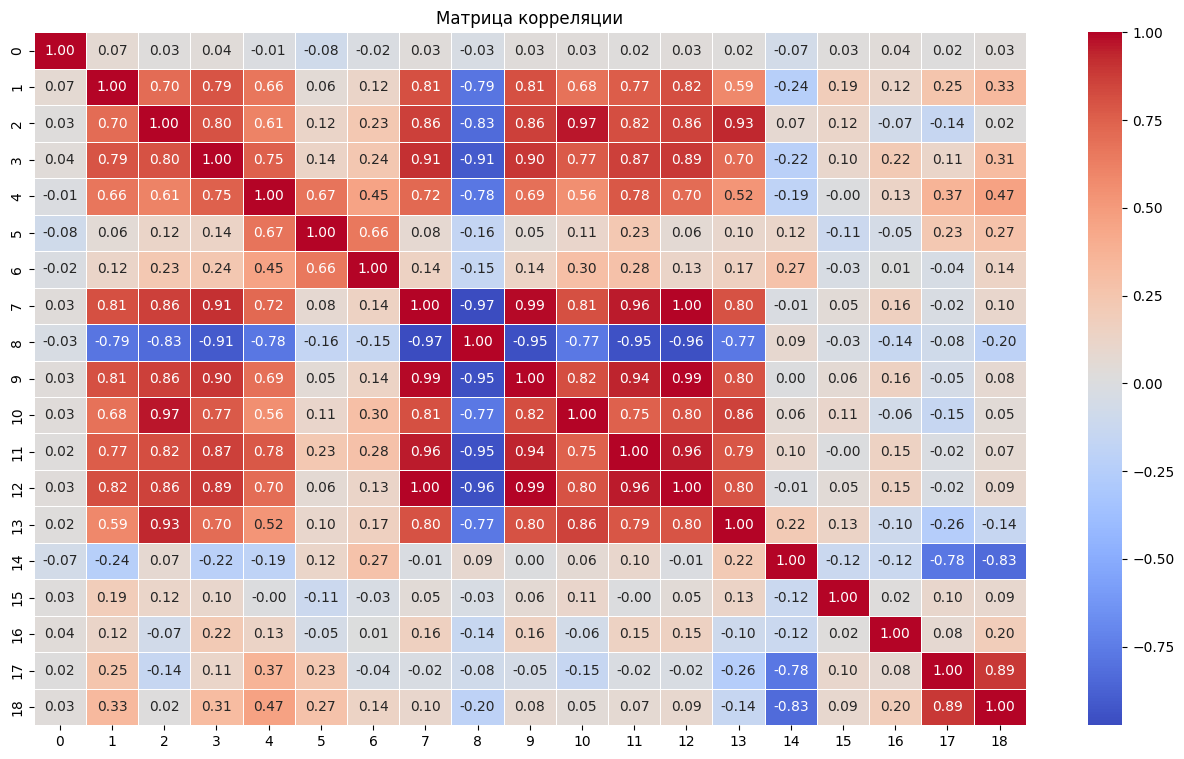

In [9]:
corr_matrx = x_train_norm_pd.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

Проанализировав матрицу корреляции, можно обратить внимание на положительную и отрицательную зависимость между признаками. 

Признаки, которые стремятся ближе к -1 - `отрицательная` зависимость.

Признаки, которые стремятся ближе к 1 - `положительная` зависимость.

Признаки, которые имеют близкое к 1 значение (по модулю) можно исключить из анализа (удалить)

---
 
Например, можно заметить, ярко выраженную корреляцию между признаками ` 1 - 3 ` и признаками `7 - 13 `.

Стоит так же обратить внимание на признак ` 14 `, который имеет корреляцию с `17` и `18` признаками.

Так же есть корреляция между `17` и `18` признаками.

--- 
##### Проверка на наличие выбросов. Построение Boxplot's

Так как столбцов не так много, можно построить для каждого график и оценить визуально.
Если столбцов было бы гораздо больше, пришлось бы анализировать на выбросы с помощью квантилей.

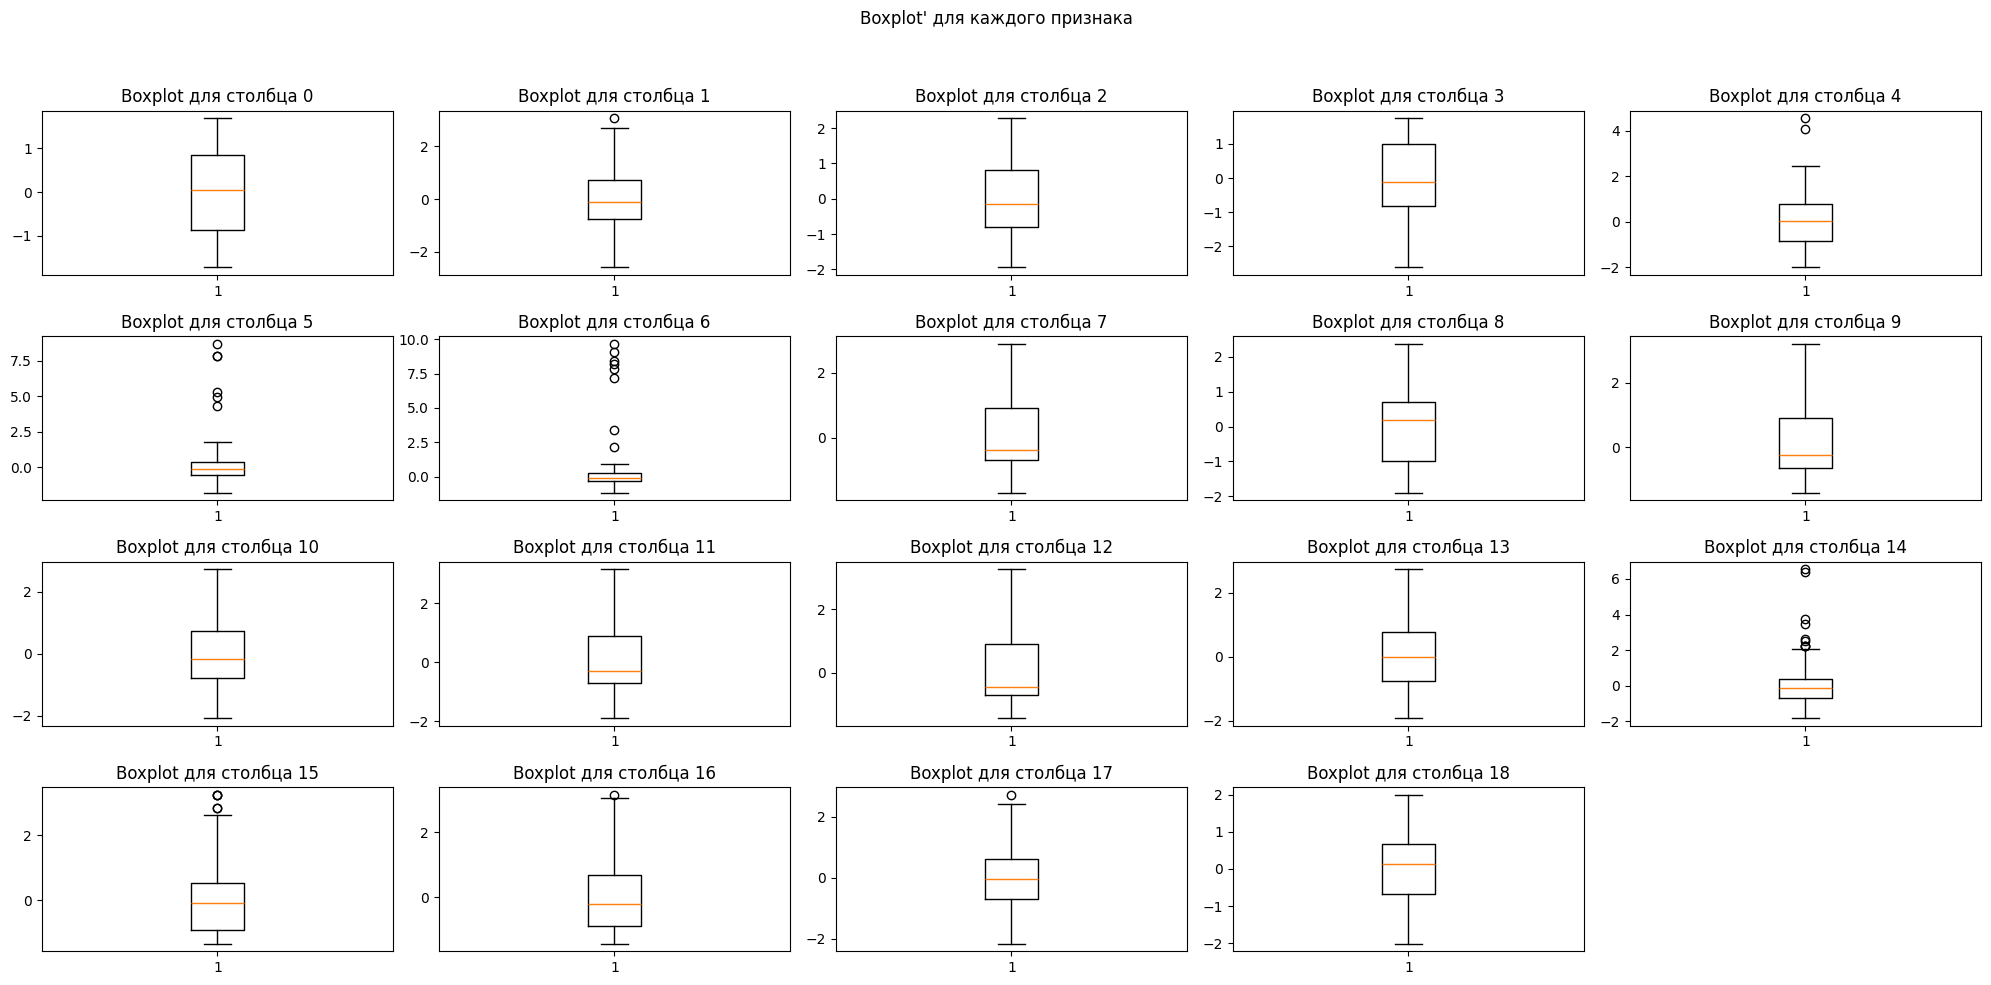

In [10]:
num_columns = x_train_norm_pd.shape[1]

ncols = 5  # Количество столбцов в сетке графиков
nrows = (num_columns + ncols - 1) // ncols  # Количество строк в сетке графиков

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_columns:
        ax.boxplot(x_train_norm_pd.iloc[:, i])
        ax.set_title(f'Boxplot для столбца {i}')
    else:
        ax.axis('off')  # Отключаем оси для лишних графиков

fig.suptitle('Boxplot\' для каждого признака')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Проанализировав графики выше, можно обратить внимание на индексы следующих признаков: `4`, `5`, `6`, `9`, `11`, `12`, `14`, `16`, `17`.
На графиках заметно наличие выбросов.

Можно построить гистограммы для каждого признакак с выбросами.

##### Подсчет количества выбросов

In [11]:
def count_outliers(df : pd.DataFrame, column):
    '''Функция для подсчета количества выбросов, по заданному столбцу'''
    '''df - DataFrame, column - имя столбца'''
    q1 = df[column].quantile(0.25)  
    q3 = df[column].quantile(0.75) 
    
    IQR = q3 - q1 #Вычисляем межквартильный размах
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column] #Подсчет кол-ва выбросов
    return len(outliers)

In [12]:
outs_cols = [1, 4, 5, 6, 9, 11, 13, 12, 14, 16, 17]
for col in outs_cols:
    print(f"Признак {col}: {count_outliers(x_train_norm_pd, col)}")

Признак 1: 1
Признак 4: 2
Признак 5: 6
Признак 6: 8
Признак 9: 0
Признак 11: 0
Признак 13: 0
Признак 12: 0
Признак 14: 9
Признак 16: 1
Признак 17: 1


##### Гистограммы

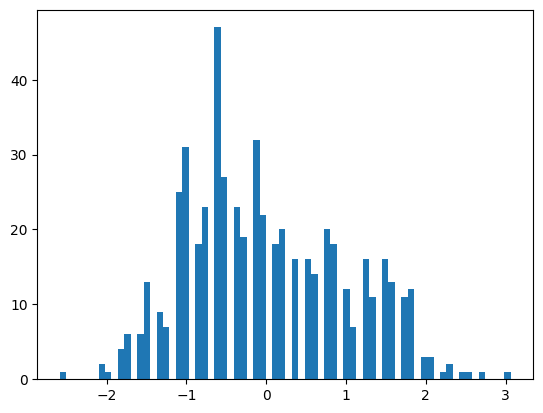

In [13]:
plt.hist(x_train_norm_pd[1], bins=70)
plt.show() 

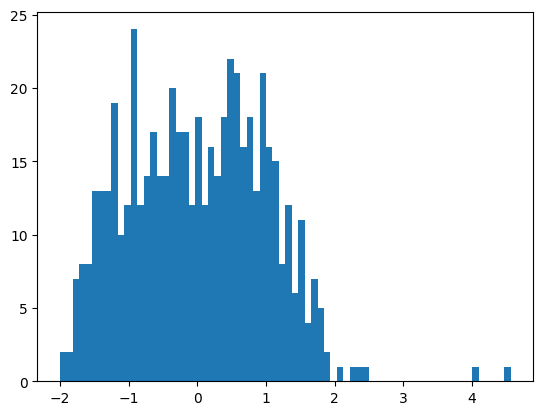

In [14]:
plt.hist(x_train_norm_pd[4], bins=70)
plt.show() 

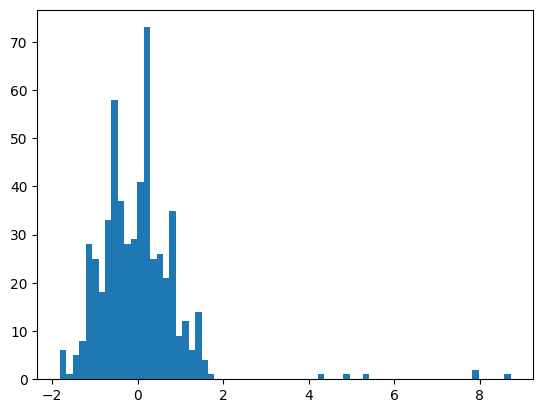

In [15]:
plt.hist(x_train_norm_pd[5], bins=70)
plt.show() 

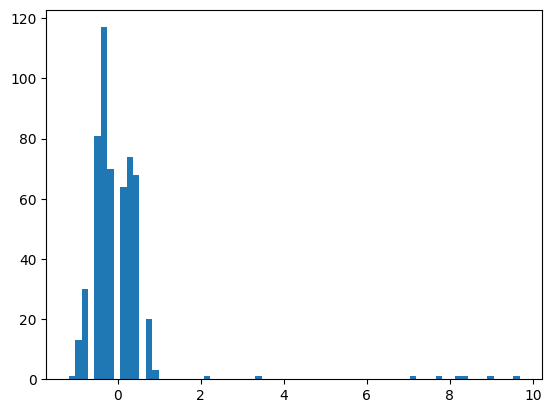

In [16]:
plt.hist(x_train_norm_pd[6], bins=70)
plt.show() 

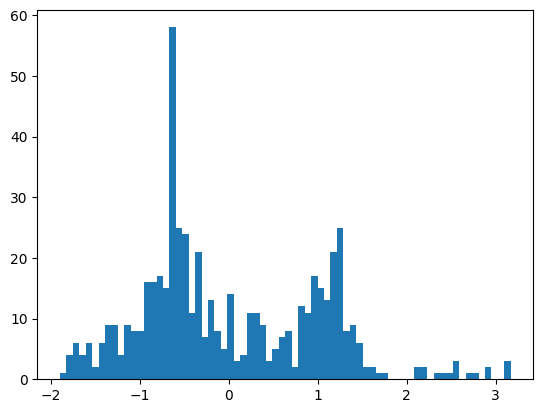

In [17]:
plt.hist(x_train_norm_pd[11], bins=70)
plt.show() 

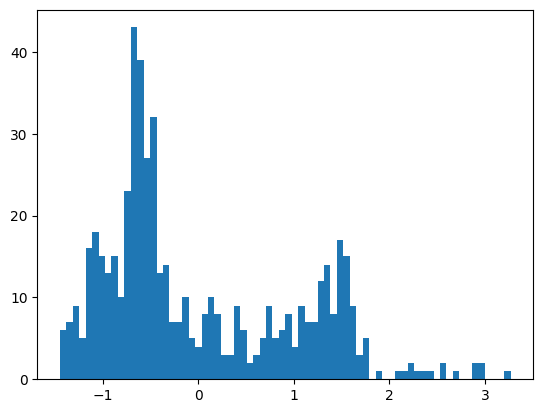

In [18]:
plt.hist(x_train_norm_pd[12], bins=70)
plt.show() 

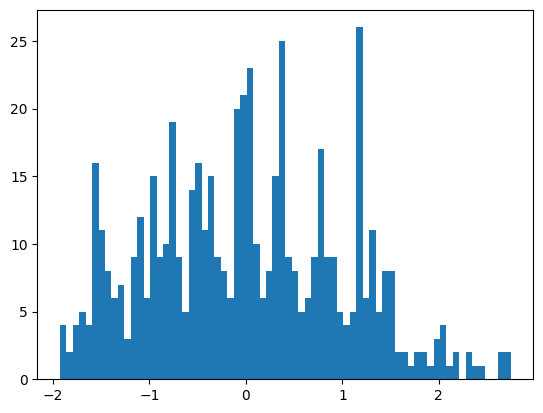

In [19]:
plt.hist(x_train_norm_pd[13], bins=70)
plt.show() 

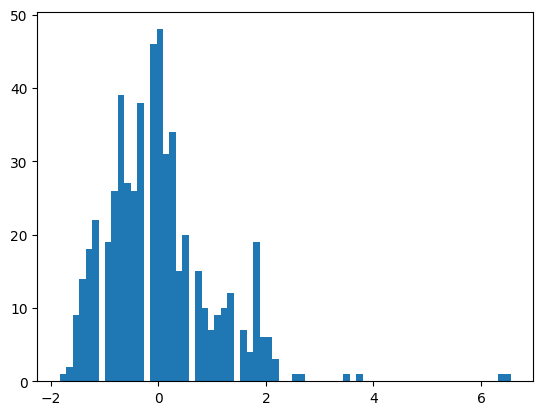

In [20]:
plt.hist(x_train_norm_pd[14], bins=70)
plt.show() 

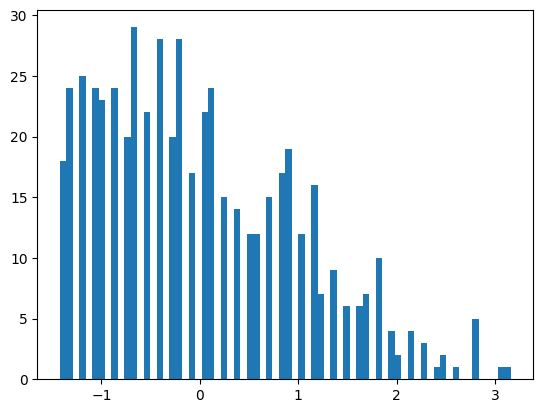

In [21]:
plt.hist(x_train_norm_pd[16], bins=70)
plt.show() 

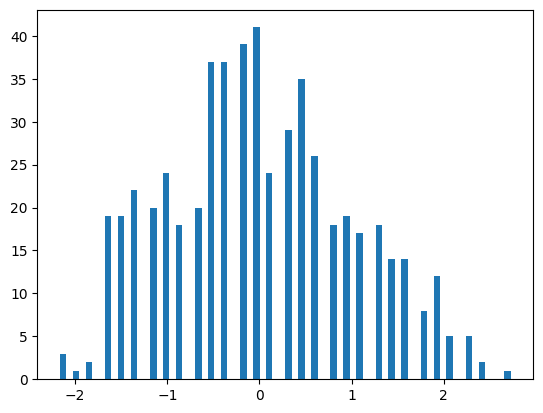

In [22]:
plt.hist(x_train_norm_pd[17], bins=70)
plt.show() 

Проанализировав выбросы, можно заметить, что не все признаки имеют выбросы, количество выбрасов, в признаках не значительное. Можно заменить медианами.

---

In [23]:
def median_replace(df : pd.DataFrame, column):
    '''Функция для замены выбросов медианой'''
    '''df - DataFrame, column - имя столбца'''
    
    median_vl = df[column].median()

    q1 = df[column].quantile(0.25)  
    q3 = df[column].quantile(0.75) 
    
    IQR = q3 - q1 #Вычисляем межквартильный размах

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df[column] = df[column].apply(
            lambda x: median_vl if (x < lower_bound or x > upper_bound) else x
        )
    return df

In [24]:
for col in outs_cols:
    x_train_norm_pd = median_replace(x_train_norm_pd, col)

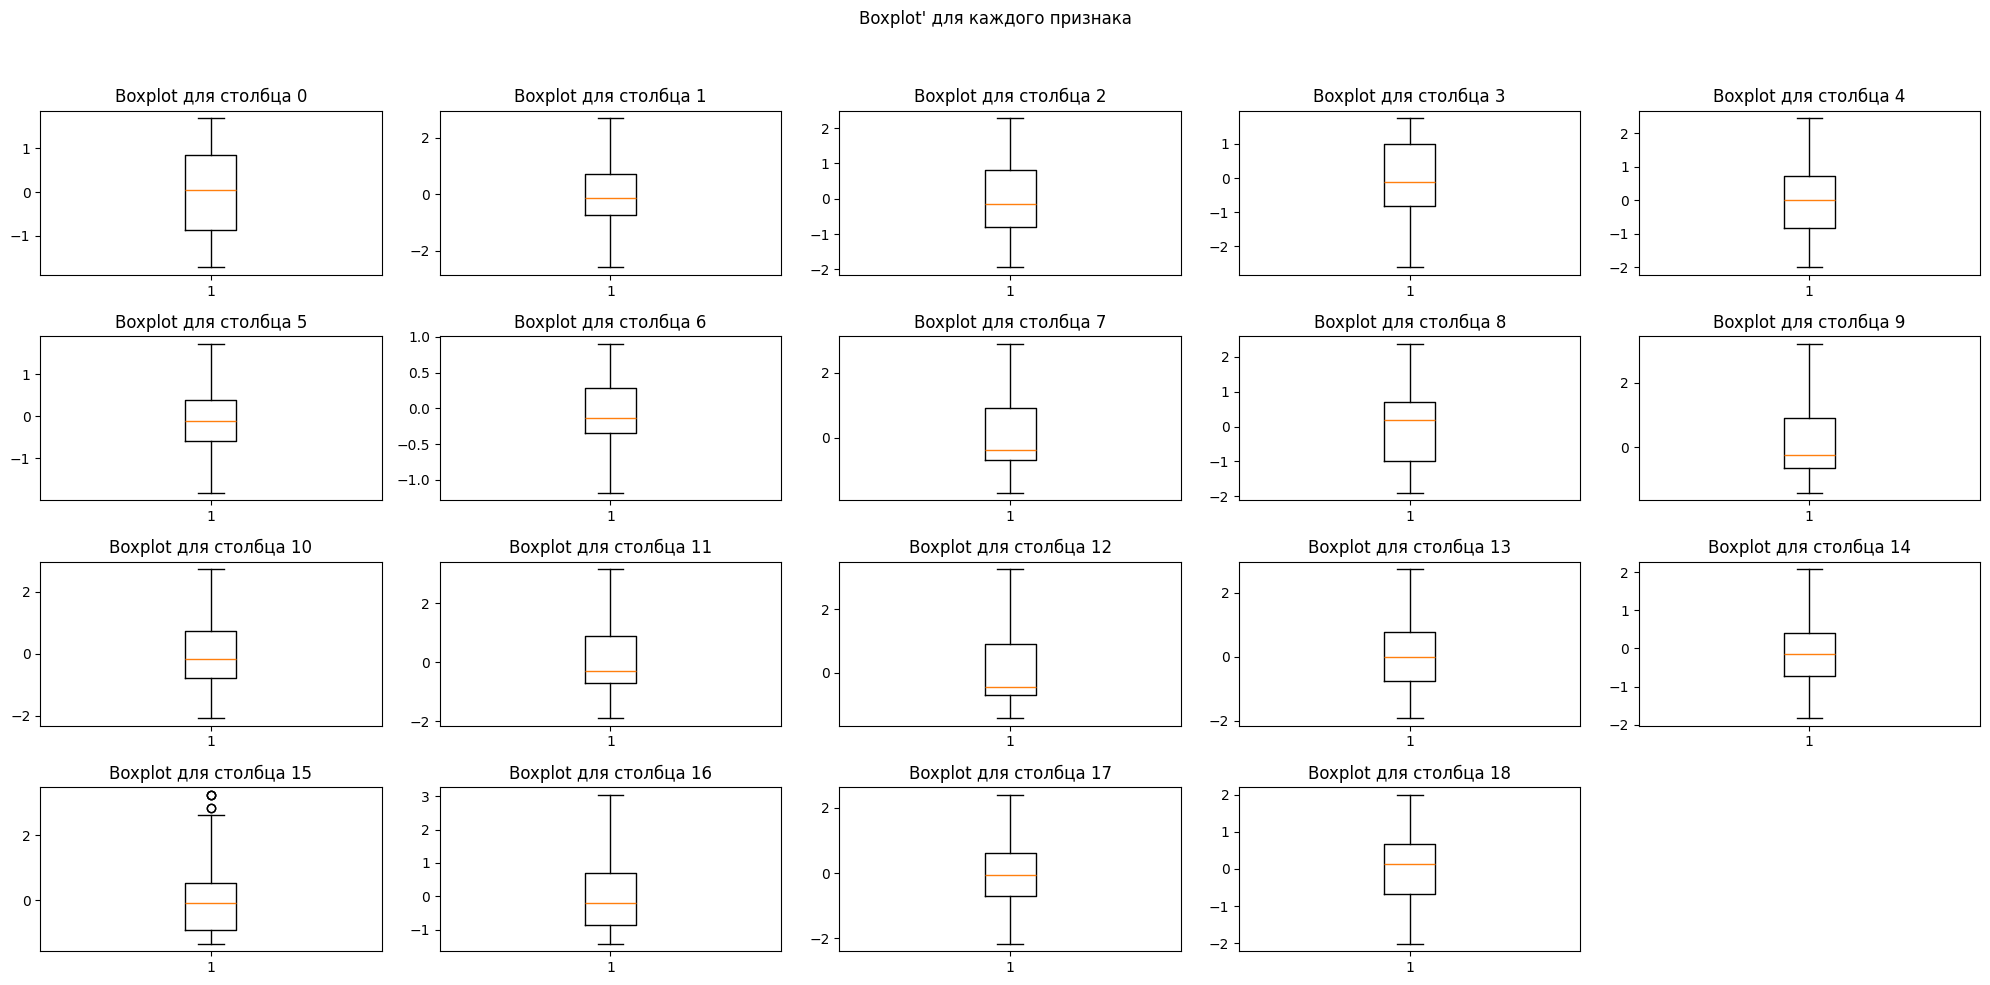

In [25]:
num_columns = x_train_norm_pd.shape[1]

ncols = 5  # Количество столбцов в сетке графиков
nrows = (num_columns + ncols - 1) // ncols  # Количество строк в сетке графиков

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_columns:
        ax.boxplot(x_train_norm_pd.iloc[:, i])
        ax.set_title(f'Boxplot для столбца {i}')
    else:
        ax.axis('off')  # Отключаем оси для лишних графиков

fig.suptitle('Boxplot\' для каждого признака')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Удалим признак `0` и коррелированные признаки (их можно найти в матрице корреляции, представлена ранее)

Признаки явно коррелированы, особенно выражены сектора 1-4 и 7-13. Из каждого можно оставить по одному признаку, было принято решение оставить `3` и `8`

In [26]:
x_train_norm_pd = x_train_norm_pd.drop(labels=[0, 1, 2, 4, 7, 9, 10, 11, 12], axis=1)
x_test_norm_pd = x_test_norm_pd.drop(labels=[0, 1, 2, 4, 7, 9, 10, 11, 12], axis=1)

print(
    x_train_norm_pd.shape,
    x_test_norm_pd.shape
)

(549, 10) (297, 10)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Графики построю потом (не совместимость версий scipy, нужен python 3.9)
# from scikitplot.metrics import plot_roc

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [28]:
logRes = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=RANDOM_STATE)

In [29]:
#parametrs from GridSearch

param_gs = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100]
}

In [30]:
grid_search = GridSearchCV(estimator=logRes, param_grid=param_gs, cv=5, scoring='accuracy')

In [31]:
# fit
grid_search.fit(x_train_norm_pd, y_train_pd)

/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linea

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [32]:
#Лучшие параметры модели
best_params = grid_search.best_params_
print(best_params)

{'C': 1, 'penalty': 'l2'}


In [33]:
#Предсказание
y_pred = grid_search.predict(x_test_norm_pd)

In [34]:
#Метрики accuracy, f1_score
accuracy = accuracy_score(y_test_pd, y_pred)
f1_logreg = f1_score(y_test_pd, y_pred, average='macro')
print("accuracy:", accuracy)
print("f1_score:", f1_logreg)

accuracy: 0.696969696969697
f1_score: 0.6812336544141775


In [ ]:
### Тут должна быть ROC кривая

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

In [35]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

In [36]:
pca = PCA(random_state=RANDOM_STATE) #Берем все компоненты
principal_components = pca.fit_transform(x_train_norm_pd)

In [37]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Объясненная дисперсия: {explained_variance}\n")
print(f"Накопление дисперсий: {cumulative_variance}")

Объясненная дисперсия: [0.35613138 0.29607843 0.12038575 0.11885963 0.04533207 0.02622283
 0.01909523 0.00939538 0.00520649 0.00329282]

Накопление дисперсий: [0.35613138 0.6522098  0.77259555 0.89145518 0.93678724 0.96301007
 0.9821053  0.99150068 0.99670718 1.        ]


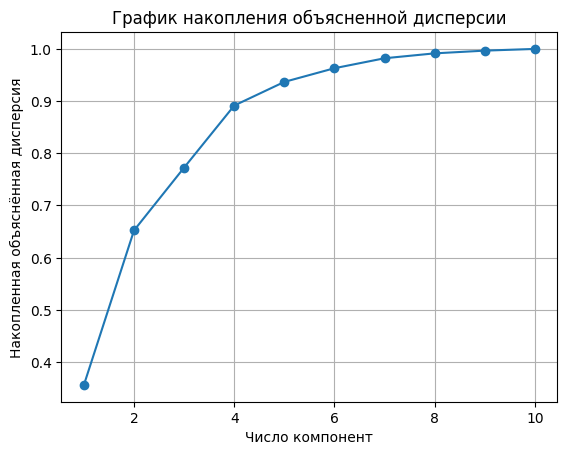

In [38]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Число компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('График накопления объясненной дисперсии')
plt.grid(True)
plt.show()

Анализ без удаления признаков: Проанализировав получившийся график, можно заметить, что с 19 до 10 компонент идет незначительный спад, с 10 до 5 более крутой склон, предположительно, будет целесообразно, для сохранения большей информации о данных, взять чисто компонент от 5 до 10, `7-8`.

Анализ с удалением признаков: тоже около 8 большая часть данных сохраняется.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

Исходя из рассмотренного ранее количества компонент, можно взять 8 компонент, так как это количество сохраняет примерно 95-97% данных.

Данные нужно нормализовать, нормализация была выполнена раньше.

In [39]:
pca_transform = PCA(n_components=8)

x_pca_train = pca_transform.fit_transform(x_train_norm_pd) #Обучаем на нормализованных данных
x_pca_test = pca_transform.transform(x_test_norm_pd)

In [40]:
x_pca_train_pd = pd.DataFrame(x_pca_train, columns=[f"pc{1+i}" for i in range(8)])
x_pca_test_pd = pd.DataFrame(x_pca_test, columns=[f"pc{1+i}" for i in range(8)])

In [41]:
print(
    x_pca_train_pd.shape,
    x_pca_test_pd.shape
)

(549, 8) (297, 8)


In [42]:
x_pca_train_pd.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.673629,-1.077184,-0.320940,-0.886026,0.937704,0.816504,-0.734699,0.201273
1,1.211406,-2.742467,-1.843793,2.182902,0.151895,0.001606,0.313363,0.203084
2,1.465186,-1.737121,1.872591,0.766073,-0.170234,0.266207,0.309403,0.116714
3,-0.826260,-0.218232,-0.106309,-0.113858,0.771268,0.301941,-0.447038,-0.038388
4,-3.305047,1.192561,0.192398,-0.291281,-0.293164,0.268632,-0.455587,0.392439


In [43]:
x_pca_test_pd.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,1.434023,1.561353,0.282791,-1.744654,-0.495605,0.181110,0.924871,-0.113762
1,0.648469,-2.154761,-0.894845,-0.327847,0.929419,0.850302,-0.649082,0.469595
2,2.005780,-0.074843,-0.439879,0.895103,-0.342903,-0.467450,-0.592610,0.046805
3,1.427616,1.951193,-1.679853,-0.008586,0.970311,-0.376666,0.460938,-0.096571
4,1.599808,0.497841,1.144775,-0.082165,-0.520411,0.284194,0.150577,-0.148401


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

In [44]:
#Кодирование меток классов
le = LabelEncoder()
le.fit(y_train)
le.classes_

y_train_encod = le.transform(y_train)
y_test_encod = le.transform(y_test)

In [45]:
logRes_with_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=RANDOM_STATE)

In [46]:
param_gs_pca_logg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 300, 500, 700, 1000],
    'C': [0.1, 1, 10, 100]
}

In [47]:
grid_search_pca_log = GridSearchCV(estimator=logRes_with_pca, param_grid=param_gs_pca_logg, cv=5, scoring='accuracy')

In [48]:
grid_search_pca_log.fit(x_pca_train_pd, y_train_encod)

/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlen

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.1, 1, 10, 100],
                         'max_iter': [100, 300, 500, 700, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [49]:
#Лучшие параметры модели
best_params_log = grid_search_pca_log.best_params_
print(best_params_log)

{'C': 100, 'max_iter': 100, 'penalty': 'l1'}


In [50]:
#Предсказание
y_pred_log_pca = grid_search_pca_log.predict(x_pca_test_pd)

In [51]:
#Метрики accuracy, f1_score
accuracy = accuracy_score(y_test_encod, y_pred_log_pca)
f1_logreg = f1_score(y_test_encod, y_pred_log_pca, average='macro')
print("accuracy:", accuracy)
print("f1_score:", f1_logreg)

accuracy: 0.6296296296296297
f1_score: 0.6131540968373945


In [ ]:
### Тут должна быть ROC кривая

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [52]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

In [53]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=RANDOM_STATE) 

In [54]:
param_gs_dtc= {
    'max_depth': [i for i in range(15)],
}

In [55]:
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_gs_dtc, cv=5, scoring='accuracy')

In [56]:
#Обучаю дерево
grid_search_dtc.fit(x_train_norm_pd, y_train_encod)

/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/base.

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_samples_leaf=2,
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14]},
             scoring='accuracy')

In [57]:
#Лучшие параметры модели
best_params_dtc = grid_search_dtc.best_params_
print(best_params_dtc)

{'max_depth': 12}


In [58]:
#Предсказание
y_pred_dtc = grid_search_dtc.predict(x_test_norm_pd)

In [ ]:
#Метрики accuracy, f1_score
#С удалением коррелированных признаков и признака 0, метрики улучшаются

accuracy = accuracy_score(y_test_encod, y_pred_dtc)
f1_logreg = f1_score(y_test_encod, y_pred_dtc, average='macro')
print("accuracy:", accuracy)
print("f1_score:", f1_logreg)

accuracy: 0.7205387205387206
f1_score: 0.7177212184664222


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

In [ ]:
#Построить ансамбль из N алгоритмов (N [2, 100], с шагом 5)
#ансамбли: Логистические регрессии, деревья решений

#Класс ансамбля логистической регрессий
#Класс ансамбля деревья решений

#функция для генерации подмножества данных для обучения ансамблей

#Есть готовый класс в sklearn, свой класс не придется писать свой

#Метрики оценки accuracy, f1_score

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample #Для подвыборок

In [61]:
#Идем по N [2, 100] с шагом 5
N = [i for i in range(2, 105, 5)]

#Для сохранения метрик
accuracy_log_res_result = []
f1_log_res_result = []

accuracy_dtc_result = []
f1_dtc_result = []

#Обучение ансамблей для заанных размеров (цикл N)
#Оптимальные гиперпараметры моделей (полученные ранее)

for i in range(2, 105, 5):
    # Создаем ансамбли моделей
    # logg ress: {'C': 1, 'penalty': 'l1'}
    # dbc {'max_depth' : 14}
    ans_log = BaggingClassifier(estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1200, C=1, penalty='l1', random_state=RANDOM_STATE), n_estimators=i, random_state=RANDOM_STATE, bootstrap=True)
    ans_dtc = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=14, random_state=RANDOM_STATE), n_estimators=i, random_state=RANDOM_STATE, bootstrap=True)

    # Обучаем модели
    ans_log.fit(x_train_norm, y_train_encod)
    ans_dtc.fit(x_train_norm, y_train_encod)
    # Предсказываем
    log_pred = ans_log.predict(x_test_norm)
    dtc_pred = ans_dtc.predict(x_test_norm)
   
    
    # Вычисляем метрики
    #  ---  Лог регрессия
    acc_log = accuracy_score(y_test_encod, log_pred)
    f1_log = f1_score(y_test_encod, log_pred, average='macro')

    accuracy_log_res_result.append(acc_log)
    f1_log_res_result.append(f1_log)

    #  ---  Деревья
    acc_dtc = accuracy_score(y_test_encod, dtc_pred)
    f1_dtc = f1_score(y_test_encod, dtc_pred, average='macro')

    accuracy_dtc_result.append(acc_dtc)
    f1_dtc_result.append(f1_dtc)

/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlen

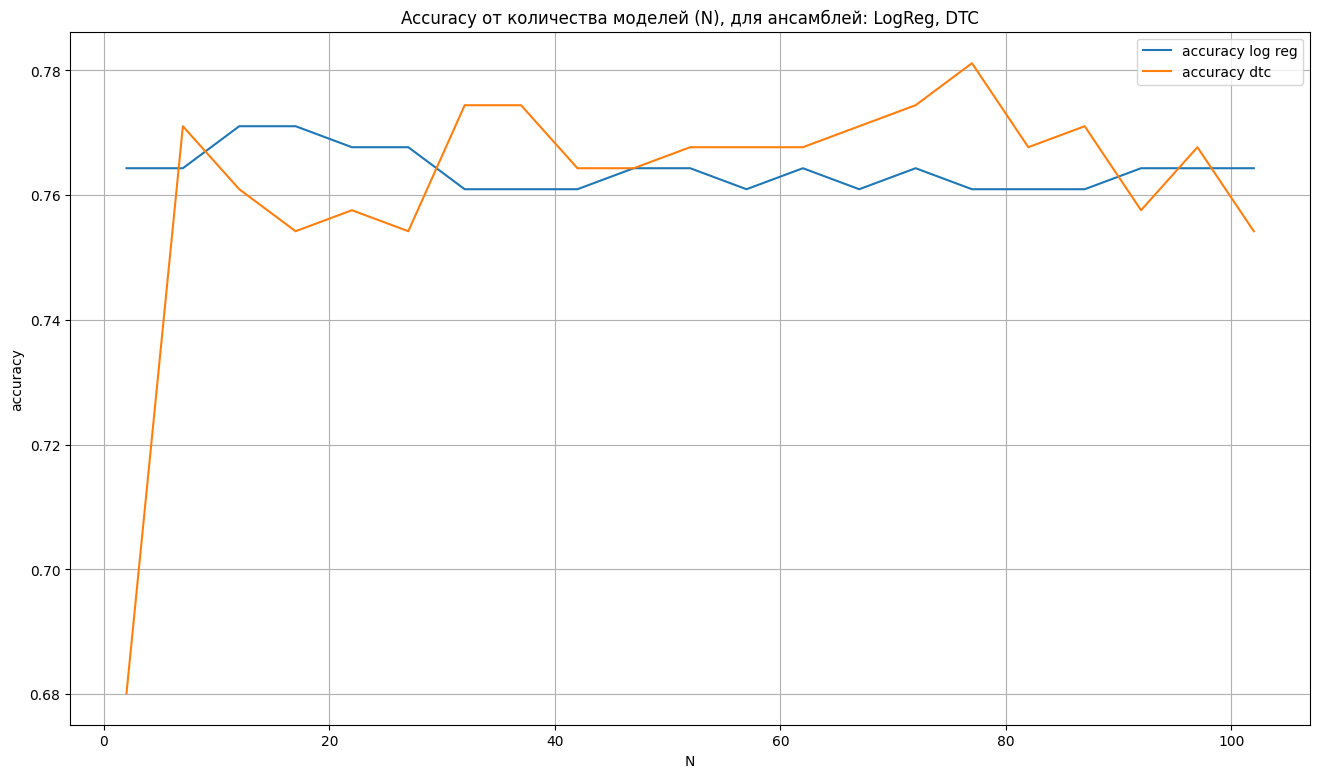

In [62]:
# Accuracy
plt.figure(figsize=(16, 9))
plt.plot(N, accuracy_log_res_result, label="accuracy log reg") 
plt.plot(N, accuracy_dtc_result, label="accuracy dtc") 

plt.title("Accuracy от количества моделей (N), для ансамблей: LogReg, DTC")
plt.xlabel("N")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()

plt.show()

Пик по accuracy достигается для ансамбля логистических регрессий с количеством моделей около 90.

Для деревьев решений примерно 30


При удалении коррелированных признаков, метрики улучшаются. Пики достигаются около 70 моделей.

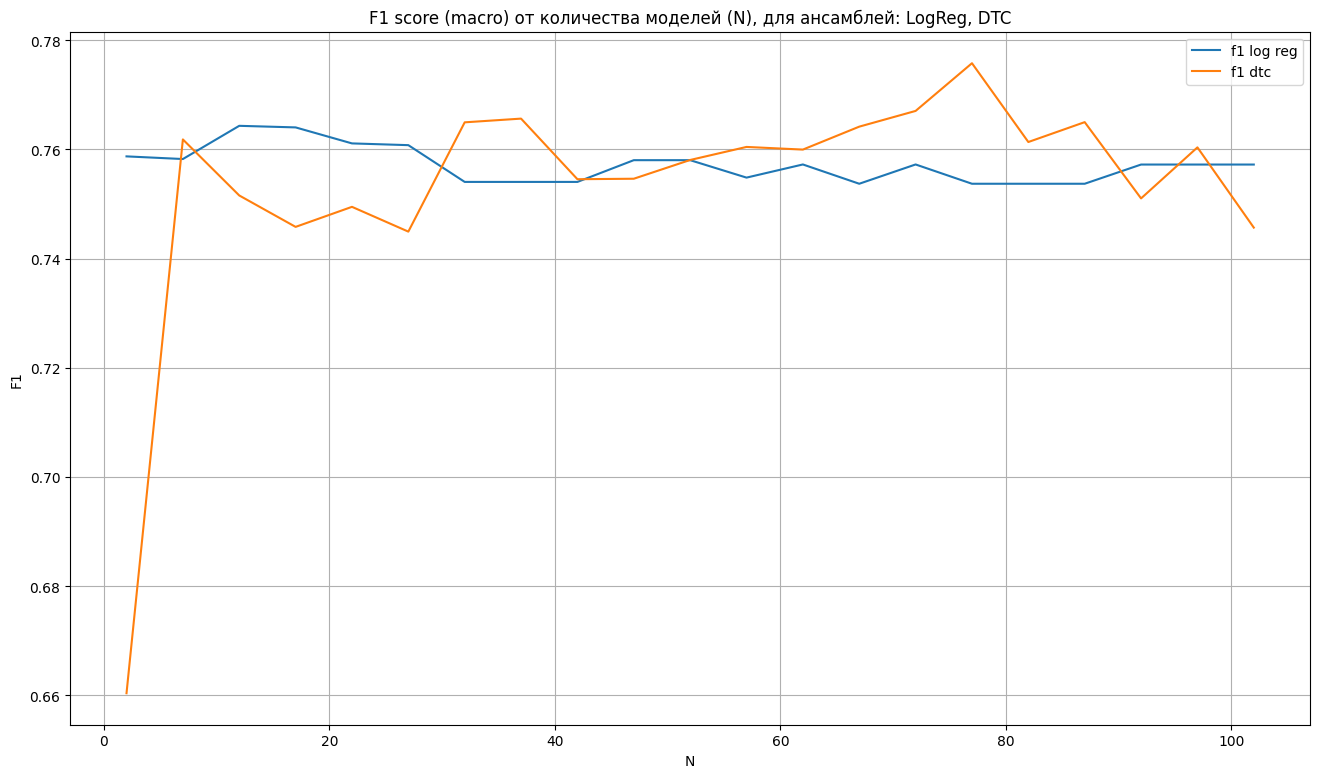

In [63]:
# F1 score
plt.figure(figsize=(16, 9))
plt.plot(N, f1_log_res_result, label="f1 log reg") 
plt.plot(N, f1_dtc_result, label="f1 dtc") 

plt.title("F1 score (macro) от количества моделей (N), для ансамблей: LogReg, DTC")
plt.xlabel("N")
plt.ylabel("F1")
plt.grid(True)
plt.legend()

plt.show()

Пик по f1 для логистической регресии достигается с количеством моделей около 90.

Деревьев решений около 10

При удалении коррелированных признаков, метрики улучшаются. Пики достигаются около 70 моделей.

Является максимальная глубина оптимальной для ансамбля, которая была найдена в 2.5? Можно уменьшить глубину и проверить результаты. При уменьшении глубины до 4, метрики ухудшились. Пики стали достигаться с количестом моделей до 20. accuracy and f1 score достигало 0.7 и 0.68 соотвественно

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [64]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [65]:
grid_clf = {'n_estimators' : [i for i in range(2, 105, 5)]}
clf = RandomForestClassifier(max_depth=14, random_state=RANDOM_STATE, criterion='entropy', min_samples_leaf=2)

In [66]:
grid_search_clf = GridSearchCV(estimator=clf, param_grid=grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(x_train_norm, y_train_pd)

/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py:1389: DataCon

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=14,
                                              min_samples_leaf=2,
                                              random_state=42),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             scoring='accuracy')

In [67]:
best_params_clf = grid_search_clf.best_params_
print(best_params_clf)

{'n_estimators': 37}


Судя по графикам, которые были приведены ранее, получить наилучшее значение метрик можно с меньшим количетвом деревьев (около 30).

In [68]:
y_pred_clf = grid_search_clf.predict(x_test_norm)

In [69]:
#Метрики accuracy, f1_score
accuracy = accuracy_score(y_test_pd, y_pred_clf)
f1_logreg = f1_score(y_test_pd, y_pred_clf, average='macro')
print("accuracy:", accuracy)
print("f1_score:", f1_logreg)

accuracy: 0.7542087542087542
f1_score: 0.7418883882179316


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE

In [70]:
log_reg_last = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1200, C=1, penalty='l1', random_state=RANDOM_STATE)
dtc_last = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2, random_state=RANDOM_STATE)
rfc = RandomForestClassifier(max_depth=14, n_estimators=102, random_state=RANDOM_STATE, criterion='entropy', min_samples_leaf=2)

In [71]:
#Используем нормализованные данные
who = x_train_norm_pd.shape[0] // 10
rem = x_train_norm_pd.shape[0] % 10

index_arr_splits = [(i+1) * who for i in range(10)]

if rem != 0:
    index_arr_splits[-1] += rem

index_arr_splits

[54, 108, 162, 216, 270, 324, 378, 432, 486, 549]

In [72]:
#Списки для accuracy, f1 для каждой модели

acc_log = []
acc_dtc = []
acc_rfc = []

f1_log = []
f1_dtc = []
f1_rfc = []

In [73]:
for i in index_arr_splits: #Идем по индексам разделения
    log_reg_last = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1200, C=1, penalty='l1', random_state=RANDOM_STATE)
    dtc_last = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2, random_state=RANDOM_STATE)
    rfc = RandomForestClassifier(max_depth=14, n_estimators=102, random_state=RANDOM_STATE, criterion='entropy', min_samples_leaf=2)

    log_reg_last.fit(x_train_norm_pd[:i], y_train_encod[:i])
    dtc_last.fit(x_train_norm_pd[:i], y_train_encod[:i])
    rfc.fit(x_train_norm_pd[:i], y_train_encod[:i])

    y_log_pred = log_reg_last.predict(x_test_norm_pd)
    y_dtc_pred = dtc_last.predict(x_test_norm_pd)
    y_rfc_pred = rfc.predict(x_test_norm_pd)
    
    acc_log.append(accuracy_score(y_test_encod, y_log_pred))
    acc_dtc.append(accuracy_score(y_test_encod, y_dtc_pred))
    acc_rfc.append(accuracy_score(y_test_encod, y_rfc_pred))    

    f1_log.append(f1_score(y_test_encod, y_log_pred, average='macro'))
    f1_dtc.append(f1_score(y_test_encod, y_dtc_pred, average='macro'))
    f1_rfc.append(f1_score(y_test_encod, y_rfc_pred, average='macro'))

/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nikita/progML/miniconda/yes/envs/mlen

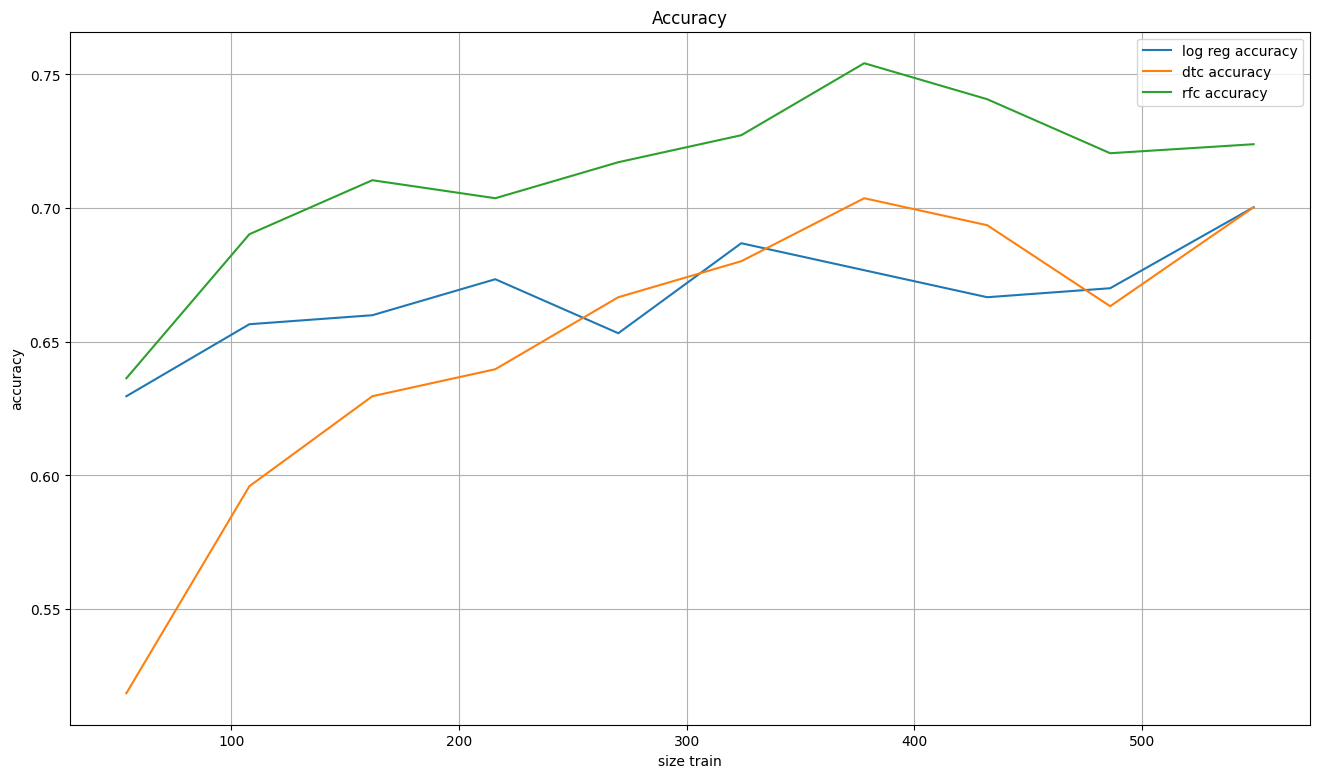

In [75]:
#Графики accuracu

plt.figure(figsize=(16, 9))
plt.plot(index_arr_splits, acc_log, label="log reg accuracy") 
plt.plot(index_arr_splits, acc_dtc, label="dtc accuracy")
plt.plot(index_arr_splits, acc_rfc, label="rfc accuracy")  

plt.title("Accuracy")
plt.xlabel("size train")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()

plt.show()


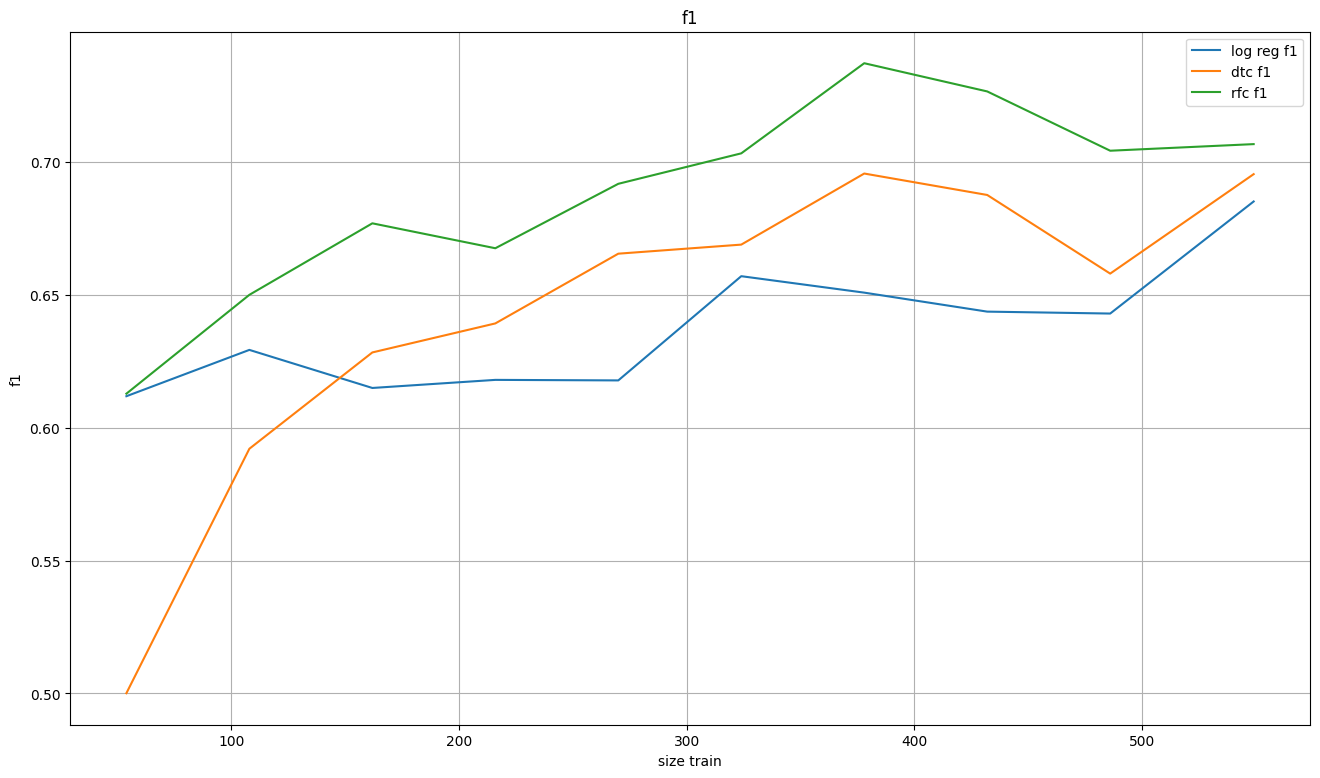

In [76]:
plt.figure(figsize=(16, 9))
plt.plot(index_arr_splits, f1_log, label="log reg f1") 
plt.plot(index_arr_splits, f1_dtc, label="dtc f1")
plt.plot(index_arr_splits, f1_rfc, label="rfc f1")  

plt.title("f1")
plt.xlabel("size train")
plt.ylabel("f1")
plt.grid(True)
plt.legend()

plt.show()

Исходя из данных графиков можно сделать вывод, что метрики увеличиваются от увеличения размера обучающих данных.

Было проведено 2 анализа, с сохранением всех признаков (кроме 0, так как предположительно это ID) и с удалением признаков с корреляцией. При использовании всех признаков метрики получаются хуже, чем без зависимых признаков. 

> Примечание: 
> 1. Чтобы проверить как ведут себя модели с удаленными признаками, как меняются результаты, достаточно закомментировать ячейку в которой происходит удаление признаков и запусить все ячейки подрят.
> 2. Данные для анализа были взяты с репозитория github, где находился сам блокнот с заданием.